In [1]:
# All imports
import numpy as np
from numpy import genfromtxt
import pandas as pd
import csv 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib_venn import venn3
from matplotlib_venn import venn2
import venn

# ExtraTreesClassifier imports
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

# Recursive Feature Selection imports
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

# ANOVA imports
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# File path (the file may require non-numerical values across the top row,
# so an extra portion may need to be added to modify this based on inputs).
dataFolder = 'Data/'
dataFile = dataFolder + 'bandsOnTopWithClassification.csv'

# Load the dataset
df = pd.read_csv(dataFile)
indColumn = df.iloc[:,0:767] #independent columns
targetColumn = df.iloc[:,-1] #target column

In [3]:
# Specify features to select (if applies)
lower_bound = 300
upper_bound = 301

# Specify seed value for consistent results (if applies)
seed_value = 13

# Note whether to flip outputs (specific to each algorithm)
# ETC_flip = True
# RFE_flip = False
# ANOVA_flip = True

# Notes:
# Seed value was an arbitrairily picked number

In [4]:
# Set Methods
def toSet(current_data, n_to_select):
    current_data = list(np.asarray(current_data, dtype = 'int'))
    current_data = current_data[0:n_to_select]
    set_output = set(current_data)
    return set_output
    
def setName(obj):
    namespace = globals()
    return [name for name in namespace if namespace[name] is obj]
    
def sL(x):
    return str(len(x))

def twoIntersections(set1, set2, onlyTwo):
    newSet1 = set1.intersection(set2)
    if onlyTwo:
        print(setName(set1) + setName(set2))
        print("New Set Length = " + sL(newSet1))
    return newSet1

def twoIntersectionsLengthOnly(set1, set2):
    newSet1 = set1.intersection(set2)
    output = len(newSet1)
    return output

def twoDifferencesLengthOnly(set1, set2):
    newSet1 = set1.difference(set2)
    output = len(newSet1)
    return output

def twoDifferences(set1, set2):
    newSet1 = set1.difference(set2)
    output = newSet1
    return output

def threeIntersections(set1, set2, set3):
    newSet1 = twoIntersections(set1, set2, False).intersection(set3)
    return newSet1

def threeIntersectionsLengthOnly(set1, set2, set3):
    newSet1 = twoIntersections(set1, set2, False).intersection(set3)
    output = len(newSet1)
    return output

def threeDifferencesLengthOnly(set1, set2, set3):
    newSet1 = set1.difference(set2)
    newSet2 = newSet1.difference(set3)
    output = len(newSet2)
    return output

In [5]:
# Algorithms

def Run_ETC(n_to_select):
    
    ETC_flip = True
    
    # Run the model
    ETC_model = ExtraTreesClassifier(random_state = seed_value)
    ETC_model.fit(indColumn,targetColumn)

    # Rank the output indicies
    ETC_output = ETC_model.feature_importances_
    sorted_index = np.argsort(ETC_output)
    
    if ETC_flip:
        sorted_index = np.flip(sorted_index)
    
    set_output = toSet(sorted_index, n_to_select)
    
    return set_output

def Run_RFE(n_to_select):
    
    RFE_flip = False
    
    # Run the model
    estimator = SVR(kernel="linear")
    RFE_model = RFE(estimator, n_features_to_select=n_to_select, step=1)
    RFE_model.fit(indColumn, targetColumn)

    # Rank the output indicies
    RFE_output = RFE_model.ranking_
    sorted_index = np.argsort(RFE_output)
    
    if RFE_flip:
        sorted_index = np.flip(sorted_index)
        
    set_output = toSet(sorted_index, n_to_select)
    
    return set_output

def Run_ANOVA(n_to_select):
    
    ANOVA_flip = True
    
    # Run the model
    ANOVA_model = SelectKBest(f_classif, k=4)
    ANOVA_model.fit(indColumn, targetColumn)

    # Rank the output indicies
    ANOVA_scores = -np.log10(ANOVA_model.pvalues_)
    ANOVA_scores /= ANOVA_scores.max()
    sorted_index = np.argsort(ANOVA_scores)
    
    if ANOVA_flip:
        sorted_index = np.flip(sorted_index)
        
    set_output = toSet(sorted_index, n_to_select)
    
    return set_output

# Notes:
# k=4, step=1, kernel="linear"

In [6]:
# set_lengths = []
# new_sets = []

# for i in range(lower_bound, upper_bound):
#     ETC_curr = Run_ETC(i)
#     RFE_curr = Run_RFE(i)
#     ANOVA_curr = Run_ANOVA(i)
    
#     lengths = threeIntersectionsLengthOnly(ETC_curr, RFE_curr, ANOVA_curr)
#     set_lengths.append(lengths)
    
#     intersections = threeIntersections(ETC_curr, RFE_curr, ANOVA_curr)
#     new_sets.append(intersections)

In [7]:
def loadDatasets(file_name, n_to_select, needs_flip):
    file_path = file_name + '_' + str(n_to_select) + '.csv'
    current_data = genfromtxt(file_path, delimiter=',')
    
    if needs_flip:
        current_data = np.flip(current_data)

    current_data = list(np.asarray(current_data, dtype = 'int'))
    current_data = current_data[0:n_to_select]
    set_output = set(current_data)
    
    return set_output

def loadLit(file_name, n_to_select, needs_flip):
    file_path = file_name + '_' + str(n_to_select) + '.csv'
    current_data = genfromtxt(file_path, delimiter=',')
    
    if needs_flip:
        current_data = np.flip(current_data)

    current_data = list(np.asarray(current_data, dtype = 'int'))
    current_data = current_data[0:n_to_select + 1]
    set_output = set(current_data)
    
    return set_output

In [8]:
i = 300

set_lengths = []
new_sets = []

ETC_curr = Run_ETC(i)
RFE_curr = Run_RFE(i)
ANOVA_curr = Run_ANOVA(i)

ALL_3 = threeIntersections(ETC_curr, RFE_curr, ANOVA_curr)

Lit_curr = loadLit('Literature_Bands', 60, False)

In [9]:
# print(ALL_3)

sorted_list = sorted(Lit_curr)
print(sorted_list)
print(len(sorted_list))

# sorted_set = set(sorted_list)
# print(sorted_set)


sim = Lit_curr.intersection(ALL_3)
diff = Lit_curr.difference(ALL_3)
print(sim)
print(len(sim))
sorted_sim = sorted(sim)
print(sorted_sim)
print(diff)
print(len(diff))

[17, 20, 22, 35, 37, 40, 42, 43, 45, 47, 48, 53, 64, 69, 71, 74, 79, 82, 87, 88, 89, 90, 97, 99, 100, 104, 108, 109, 110, 111, 114, 115, 119, 129, 130, 131, 135, 136, 137, 144, 151, 167, 168, 169, 170, 171, 181, 195, 196, 197, 215, 525, 534, 567, 620, 622, 624, 627, 722, 727]
60
{35, 196, 197, 167, 168, 169, 170, 171, 727, 620, 622, 79, 624, 82, 87, 88, 89}
17
[35, 79, 82, 87, 88, 89, 167, 168, 169, 170, 171, 196, 197, 620, 622, 624, 727]
{129, 130, 131, 135, 136, 137, 525, 144, 17, 20, 22, 151, 534, 37, 40, 42, 43, 45, 47, 48, 53, 181, 567, 64, 195, 69, 71, 74, 722, 215, 90, 97, 99, 100, 104, 108, 109, 110, 111, 114, 115, 627, 119}
43


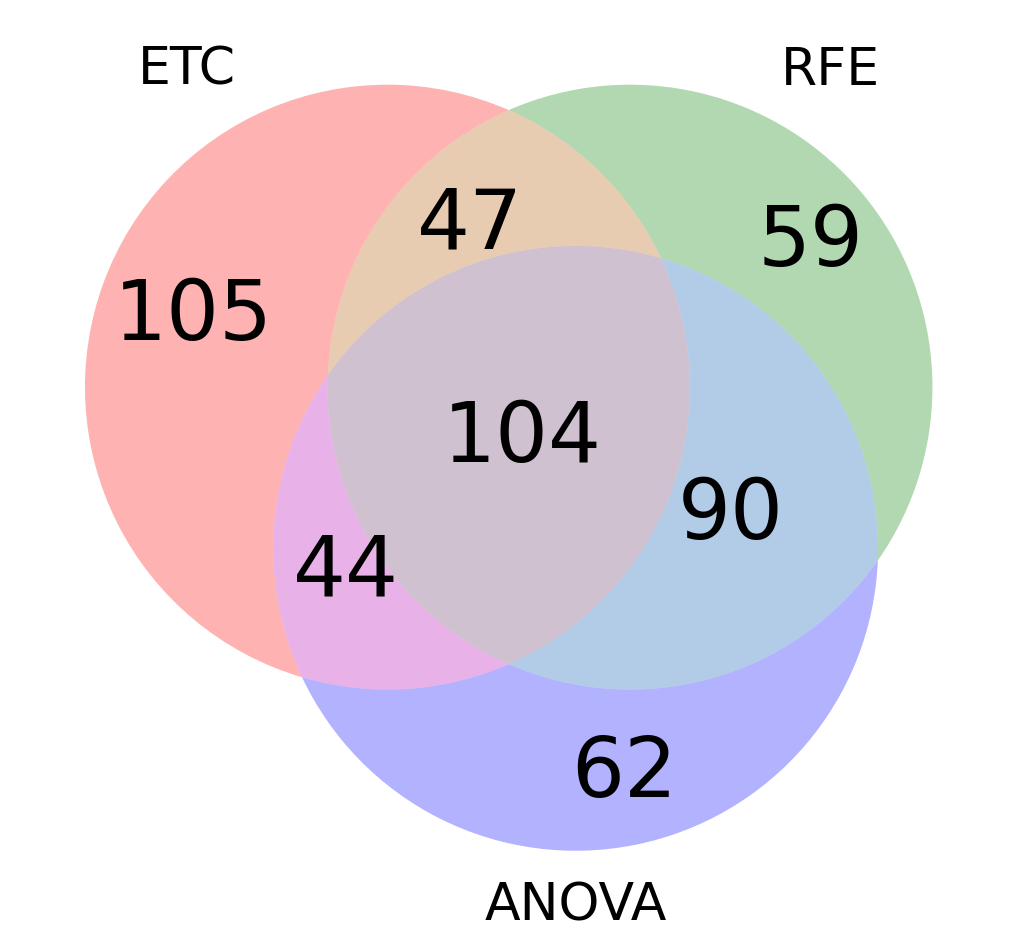

In [10]:
three_way_venn = venn3([ETC_curr, RFE_curr, ANOVA_curr], 
                   set_labels = ('ETC', 'RFE', 'ANOVA'), 
                   alpha = .3)

# Outside text
for text in three_way_venn.set_labels:  
    text.set_fontsize(25)
    
# Inside text
for text in three_way_venn.subset_labels: 
    text.set_fontsize(40)

fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.set_dpi(150)

# Set the font size of the labels and title
# plt.rcParams.update({'font.size': 30})

# Display the Venn diagram
plt.show()


# venn2([ALL_3, LIT_curr], set_labels=('Three Way Intersection', 'Literature Bands'))

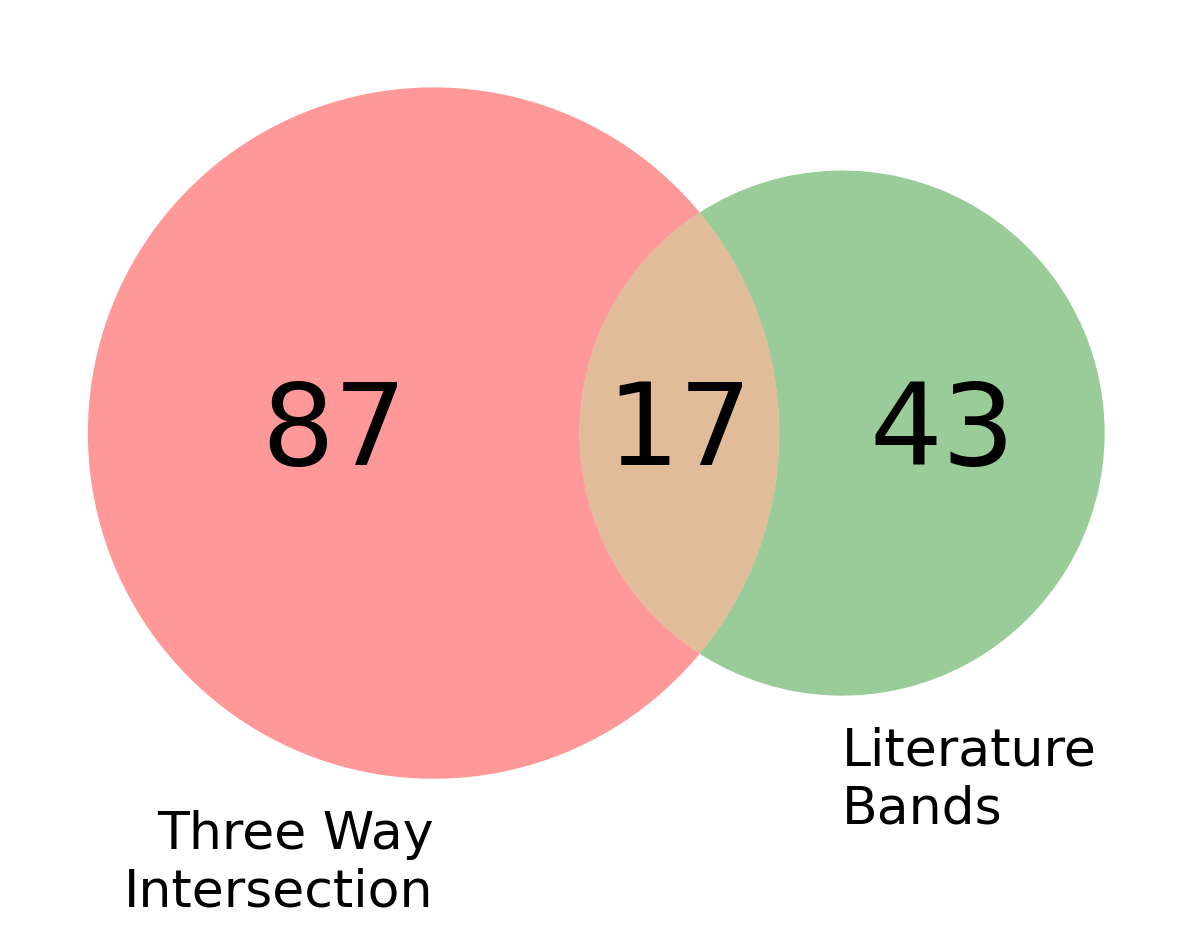

In [11]:
two_way_venn = venn2([ALL_3, Lit_curr], set_labels=('Three Way\nIntersection', 'Literature\nBands'))

# Outside text
for text in two_way_venn.set_labels:  
    text.set_fontsize(25)
    
# Inside text
for text in two_way_venn.subset_labels: 
    text.set_fontsize(55)

fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.set_dpi(150)

# Display the Venn diagram
plt.show()